# Different Approaches to Defining Neural Networks with Keras and TensorFlow

[TensorFlow](https://www.tensorflow.org/) 2.0 came with many new exciting updates. One of these updates was full integration with the very popular [Keras API](https://keras.io/) for developing deep learning models. Before TensorFlow 2.0, you had two install TensorfFlow and Keras separately. Now, Keras comes as a submodule of TensorFlow (*i.e.*, tensorflow.keras). We will be using Keras and TensorFlow on the majority of tutorials in this class. There are 3 ways to define Neural Networks with Keras. In this tutorial we will cover these different ways.

The learning goals of this tutorial are:
    - Introduce the Keras sequential API, functional API and model subclassing methods for defining neural networks;
    - Illustrate a simple classiifcation problem using the Iris dataset.


# Importing Python Libraries 

If you get an error that a library is not installed, most libraries you can stall on a jupyter notebook by creating a new cell and typing:

- *! pip install library_name*


In [1]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris  # Function for loading the Iris dataset
from sklearn.model_selection import train_test_split # Function for splitting the dataset

# Data exploration

In [2]:
# Load the dataset and return to the defined variable 
dataset = load_iris()

In [3]:
# Load iris data into a DataFrame
dframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# add "target_label" column to the dataset and name it "label"
dframe['labels'] = dataset.target.astype(int) # Labels are represented as integers
# use of String label
dframe['label_names'] = dframe.labels.replace(dict(enumerate(dataset.target_names)))

In [4]:
# Prints the 5 first rows/samples of the dataset
dframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
# Generates a short description of the dataset (missing values, mean values, etc.)
dframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Train, Validation and Test Sets Split

In [6]:
# Extracting the features and labels from the dataset 
X = np.asarray(dframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
Y = np.asarray(dframe['labels'])

# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = np.int(0.5*Y.size)
val_split = np.int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

In [7]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# 1. Change the min-max normalization above by standardization ((X - mean)/(std))
# 2. Don't normalize the data and see what happens
####################################################################################

## Representing Labels using one-hot-ecoding

In [8]:
k = np.unique(Y).size
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[0 2 0 2 1]

Y_oh_train[:5]=
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [9]:
print( "Size of X_train : " , X_train.shape)
print( "Size of X_val : " , X_val.shape)
print( "Size of X_test : " , X_test.shape)

Size of X_train :  (75, 4)
Size of X_val :  (37, 4)
Size of X_test :  (38, 4)


## Different Approaches for Defining Neural Networks

### 1. The Sequential API

In [10]:
from tensorflow.keras.models import Sequential 
# Passing a list of layers to the constructor
model = Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(4,) , name = "layer1"),
    tf.keras.layers.Dense(10, activation='relu' , name = "layer2"),
    tf.keras.layers.Dense(3, activation='softmax', name = "layer3"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 5)                 25        
_________________________________________________________________
layer2 (Dense)               (None, 10)                60        
_________________________________________________________________
layer3 (Dense)               (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 2. The Functional API

In [11]:
from tensorflow.keras.models import Model
# This returns a tensor
input_tensor = tf.keras.layers.Input(shape=(4,))
# A layer instance is callable on a tensor, and returns a tensor
x1 = tf.keras.layers.Dense(5, activation='relu')(input_tensor)
x2 = tf.keras.layers.Dense(10, activation='relu')(x1)
out_tensor = tf.keras.layers.Dense(3, activation='softmax')(x2)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=out_tensor)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## 3. Model Subclassing 

In [12]:
class MyNeuralNetwork(Model):
    def __init__(self, **kwargs):
        super(MyNeuralNetwork, self).__init__(**kwargs)
        self.dense1 = tf.keras.layers.Dense(5, activation='relu', )
        self.dense2 = tf.keras.layers.Dense(10, activation='relu')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x1 = self.dense1(inputs)
        x2 = self.dense2(x1)
        out_tensor = self.dense3(x2)
        return out_tensor
model = MyNeuralNetwork()
model.build(input_shape = (None,4))
model.summary()

Model: "my_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  25        
_________________________________________________________________
dense_4 (Dense)              multiple                  60        
_________________________________________________________________
dense_5 (Dense)              multiple                  33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## Training and Testing the Model

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model

In [16]:
# training the model 
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 300)

Epoch 1/300
2/2 [==============================] - 0s 9ms/step - loss: 0.7202 - accuracy: 0.7467 - val_loss: 0.6983 - val_accuracy: 0.7568
Epoch 2/300
2/2 [==============================] - 0s 9ms/step - loss: 0.7157 - accuracy: 0.7467 - val_loss: 0.6942 - val_accuracy: 0.7568
Epoch 3/300
2/2 [==============================] - 0s 9ms/step - loss: 0.7111 - accuracy: 0.7467 - val_loss: 0.6905 - val_accuracy: 0.7838
Epoch 4/300
2/2 [==============================] - 0s 10ms/step - loss: 0.7065 - accuracy: 0.7600 - val_loss: 0.6869 - val_accuracy: 0.7838
Epoch 5/300
2/2 [==============================] - 0s 9ms/step - loss: 0.7019 - accuracy: 0.7600 - val_loss: 0.6834 - val_accuracy: 0.8378
Epoch 6/300
2/2 [==============================] - 0s 12ms/step - loss: 0.6974 - accuracy: 0.7600 - val_loss: 0.6798 - val_accuracy: 0.8378
Epoch 7/300
2/2 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.7733 - val_loss: 0.6761 - val_accuracy: 0.8378
Epoch 8/300
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.4964 - accuracy: 0.8933 - val_loss: 0.5105 - val_accuracy: 0.9189
Epoch 60/300
2/2 [==============================] - 0s 9ms/step - loss: 0.4934 - accuracy: 0.9067 - val_loss: 0.5084 - val_accuracy: 0.9189
Epoch 61/300
2/2 [==============================] - 0s 9ms/step - loss: 0.4903 - accuracy: 0.9200 - val_loss: 0.5063 - val_accuracy: 0.9189
Epoch 62/300
2/2 [==============================] - 0s 9ms/step - loss: 0.4872 - accuracy: 0.9333 - val_loss: 0.5047 - val_accuracy: 0.9189
Epoch 63/300
2/2 [==============================] - 0s 9ms/step - loss: 0.4843 - accuracy: 0.9333 - val_loss: 0.5036 - val_accuracy: 0.9189
Epoch 64/300
2/2 [==============================] - 0s 9ms/step - loss: 0.4815 - accuracy: 0.9467 - val_loss: 0.5020 - val_accuracy: 0.9459
Epoch 65/300
2/2 [==============================] - 0s 10ms/step - loss: 0.4785 - accuracy: 0.9467 - val_loss: 0.4995 - val_accuracy: 0.9459
Epoch 66/300
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.3502 - accuracy: 0.9600 - val_loss: 0.3826 - val_accuracy: 0.9730
Epoch 118/300
2/2 [==============================] - 0s 9ms/step - loss: 0.3480 - accuracy: 0.9600 - val_loss: 0.3812 - val_accuracy: 0.9730
Epoch 119/300
2/2 [==============================] - 0s 9ms/step - loss: 0.3456 - accuracy: 0.9600 - val_loss: 0.3791 - val_accuracy: 0.9730
Epoch 120/300
2/2 [==============================] - 0s 9ms/step - loss: 0.3437 - accuracy: 0.9600 - val_loss: 0.3771 - val_accuracy: 0.9730
Epoch 121/300
2/2 [==============================] - 0s 9ms/step - loss: 0.3420 - accuracy: 0.9600 - val_loss: 0.3756 - val_accuracy: 0.9730
Epoch 122/300
2/2 [==============================] - 0s 9ms/step - loss: 0.3399 - accuracy: 0.9600 - val_loss: 0.3750 - val_accuracy: 0.9730
Epoch 123/300
2/2 [==============================] - 0s 9ms/step - loss: 0.3378 - accuracy: 0.9600 - val_loss: 0.3750 - val_accuracy: 0.9730
Epoch 124/300
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.2473 - accuracy: 0.9600 - val_loss: 0.3158 - val_accuracy: 0.9189
Epoch 176/300
2/2 [==============================] - 0s 9ms/step - loss: 0.2453 - accuracy: 0.9600 - val_loss: 0.3097 - val_accuracy: 0.9459
Epoch 177/300
2/2 [==============================] - 0s 9ms/step - loss: 0.2437 - accuracy: 0.9467 - val_loss: 0.3035 - val_accuracy: 0.9459
Epoch 178/300
2/2 [==============================] - 0s 8ms/step - loss: 0.2421 - accuracy: 0.9467 - val_loss: 0.2994 - val_accuracy: 0.9459
Epoch 179/300
2/2 [==============================] - 0s 9ms/step - loss: 0.2407 - accuracy: 0.9467 - val_loss: 0.2965 - val_accuracy: 0.9459
Epoch 180/300
2/2 [==============================] - 0s 9ms/step - loss: 0.2397 - accuracy: 0.9467 - val_loss: 0.2957 - val_accuracy: 0.9459
Epoch 181/300
2/2 [==============================] - 0s 12ms/step - loss: 0.2384 - accuracy: 0.9467 - val_loss: 0.2959 - val_accuracy: 0.9459
Epoch 182/300
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.1821 - accuracy: 0.9467 - val_loss: 0.2339 - val_accuracy: 0.9730
Epoch 234/300
2/2 [==============================] - 0s 10ms/step - loss: 0.1814 - accuracy: 0.9467 - val_loss: 0.2332 - val_accuracy: 0.9730
Epoch 235/300
2/2 [==============================] - 0s 9ms/step - loss: 0.1803 - accuracy: 0.9467 - val_loss: 0.2332 - val_accuracy: 0.9459
Epoch 236/300
2/2 [==============================] - 0s 9ms/step - loss: 0.1793 - accuracy: 0.9467 - val_loss: 0.2335 - val_accuracy: 0.9459
Epoch 237/300
2/2 [==============================] - 0s 9ms/step - loss: 0.1779 - accuracy: 0.9467 - val_loss: 0.2329 - val_accuracy: 0.9459
Epoch 238/300
2/2 [==============================] - 0s 10ms/step - loss: 0.1770 - accuracy: 0.9467 - val_loss: 0.2335 - val_accuracy: 0.9459
Epoch 239/300
2/2 [==============================] - 0s 11ms/step - loss: 0.1758 - accuracy: 0.9467 - val_loss: 0.2359 - val_accuracy: 0.9459
Epoch 240/300
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 0.1378 - accuracy: 0.9600 - val_loss: 0.2170 - val_accuracy: 0.9189
Epoch 292/300
2/2 [==============================] - 0s 9ms/step - loss: 0.1372 - accuracy: 0.9600 - val_loss: 0.2182 - val_accuracy: 0.9189
Epoch 293/300
2/2 [==============================] - 0s 9ms/step - loss: 0.1367 - accuracy: 0.9733 - val_loss: 0.2180 - val_accuracy: 0.9189
Epoch 294/300
2/2 [==============================] - 0s 9ms/step - loss: 0.1362 - accuracy: 0.9733 - val_loss: 0.2166 - val_accuracy: 0.9189
Epoch 295/300
2/2 [==============================] - 0s 12ms/step - loss: 0.1356 - accuracy: 0.9600 - val_loss: 0.2153 - val_accuracy: 0.9189
Epoch 296/300
2/2 [==============================] - 0s 12ms/step - loss: 0.1349 - accuracy: 0.9600 - val_loss: 0.2146 - val_accuracy: 0.9189
Epoch 297/300
2/2 [==============================] - 0s 11ms/step - loss: 0.1344 - accuracy: 0.9600 - val_loss: 0.2137 - val_accuracy: 0.9189
Epoch 298/300
2/2 [=====

Test loss (cross-entropy and accuracy): [0.19205155968666077, 0.9736841917037964]

Layer 0
Bias:
 [ 0.04189947  0.6064683   0.65265673  0.46094602 -0.3419411 ]
W:
 [[ 0.1124464  -0.64435554  0.7842609   1.0342042  -0.7266863 ]
 [ 0.39692333  0.7411584   0.6803319   0.43286636 -0.00585245]
 [ 1.150117    0.5508765  -0.7871595   0.5415498   0.6581558 ]
 [ 0.7424821  -0.88993347 -0.80744505  0.8321589   0.81578356]]

Layer 1
Bias:
 [-0.00600387 -0.10500789 -0.02902607  0.4701496   0.          0.23818853
 -0.26658744 -0.20536566 -0.18710484  0.24037994]
W:
 [[ 0.47922987 -0.49463665 -0.15977626  0.1630968  -0.42624202  1.0278316
   0.49563098  0.20037991  0.7317603   0.20221269]
 [-0.4004704   0.32293728 -0.09786278  1.3846078  -0.42246145 -0.82808346
  -0.26129976 -0.6570575  -1.1452307  -0.40757957]
 [ 0.4811618   0.3911596   0.18869796  1.2462208  -0.16381973 -0.45223635
   0.5502913  -0.9047097  -0.6226808  -0.8994972 ]
 [-0.6309521  -0.6885123  -0.11053745  0.4096367   0.00579995  0.4

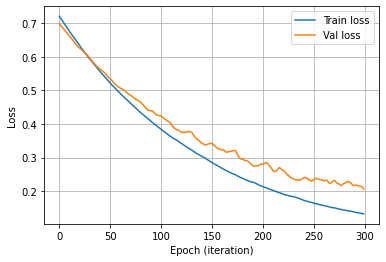

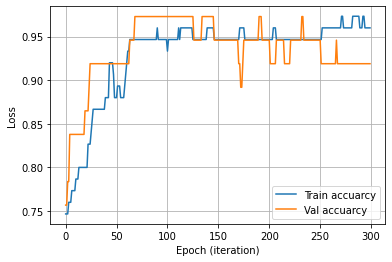

In [17]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# References for creating this jupyter notebook 

1) https://keras.io/guides/functional_api/

2) https://keras.io/api/models/sequential/

3) https://keras.io/api/models/

4) https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3

**Thanks to Kashyap Patel who helped develop this tutorial!**